In [5]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

def discrete_cmap(N, base_cmap=None):
    """Create an N-bin discrete colormap from the specified input map"""

    # Note that if base_cmap is a string or None, you can simply do
    #    return plt.cm.get_cmap(base_cmap, N)
    # The following works for string, None, or a colormap instance:

    base = plt.cm.get_cmap(base_cmap)
    print(base)
    color_list = base(np.linspace(0, 1, N))
    cmap_name = base.name + str(N)
    return base.from_list(cmap_name, color_list, N)

data = np.load("data/critical.npz")
print(data.files)
alphas = data["Alphas"]
betas = data["Betas"]
gammas = data["Gammas"]
match = data["match"]

['Alphas', 'Betas', 'Gammas', 'match', 'Q']


In [6]:
tol = 0.25
Q = data["Q"]
c = np.logical_and(match<=1+tol, match>=1-tol)

<ipython-input-6-6c2db21722bf>:3: RuntimeWarning: invalid value encountered in less_equal
  c = np.logical_and(match<=1+tol, match>=1-tol)
<ipython-input-6-6c2db21722bf>:3: RuntimeWarning: invalid value encountered in greater_equal
  c = np.logical_and(match<=1+tol, match>=1-tol)


In [67]:
r = 0.6
α = -0.5 - 1./r
β = np.arange(0,1.0,0.001)

K = (
    -2./(1.+2/r) * (1.+np.sqrt(6./r))/(1.-np.sqrt(6./r)) * 
    (1.+(1.+np.sqrt(6./r))/(1.-np.sqrt(6./r)))**(-2)
)

γ = K*β**2

q0 = np.arange(1.,100.,0.01)
α0 = 0.0
β0 = 2./(r*q0)
γ0 = (2./(r*q0) + 1.)/q0


(0, 1)

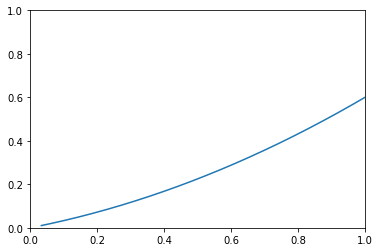

In [68]:
plt.plot(β0, γ0)

plt.xlim([0,1])
plt.ylim([0,1])

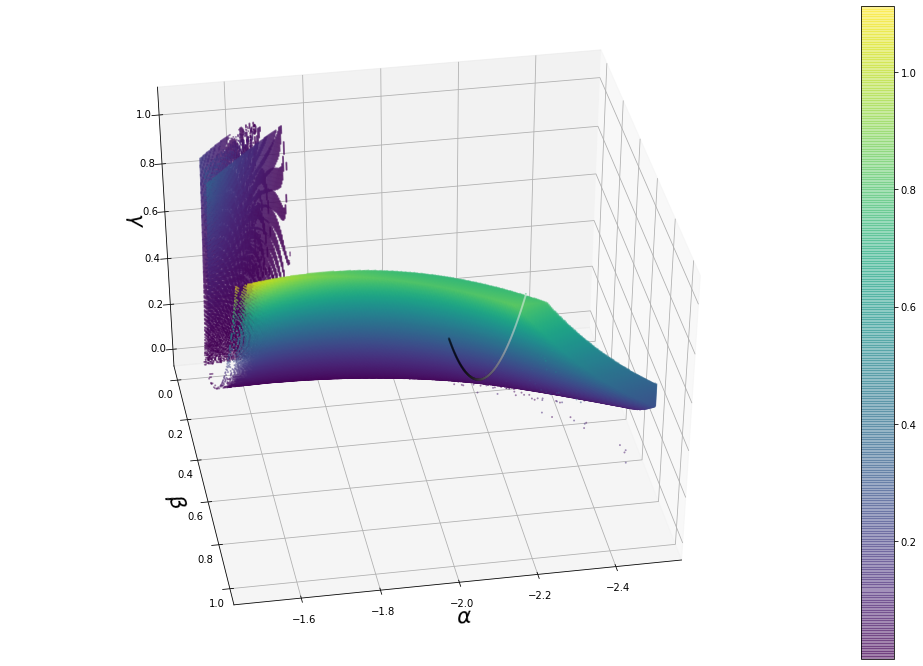

In [70]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(18,12))
ax = fig.gca(projection='3d')

sc = ax.scatter(xs=alphas[c].flatten(),ys=betas[c].flatten(),zs=gammas[c].flatten(),
           s=15,c=Q[c].flatten(),cmap=plt.get_cmap('viridis'),marker='.',linewidth=0,alpha=0.5)
ll = ax.scatter(np.ones_like(β)*α, β, γ, c=γ, cmap=plt.get_cmap("Greys_r"), s=20, linewidth=0., marker = '.', alpha=0.1)

#ax.view_init(40, 17.5)
ax.view_init(40, 80.)
#ax.view_init(40, 160.)
ax.set_xlabel(r'$\alpha$',fontsize=22)
ax.set_ylabel(r'$\beta$',fontsize=22)
ax.set_zlabel(r'$\gamma$',fontsize=22)
plt.colorbar(sc)

#plt.savefig('nonzero_3d_regime_Q-color.png',bbox_inches='tight',dpi=400)